# The Winning Formula: What Makes a Game a Hit?


<div class="alert alert-block alert-info">
<b>
    
- Entrego este proyecto completamente en inglés para incrementar su valor curricular en mi portafolio.
  
    </b> <a class="tocSkip"></a>
</div>

In this project, we will analize data from the online videogame store Ice. We want to identify patterns that determine whether a game is successful or not, and use this knowledge to plan effective marketing campaigns for promising projects.

## Introduction
The raw data is in the file `/datasets/games.csv` and contains records of up to 2016. We will build forecasts for 2017.

#### Data description
The data comes with the following fields (columns):

— Name

— Platform

— Year_of_Release

— Genre

— NA_sales (North America sales in millions of USD) 

— EU_sales (Europe sales in millions of USD) 

— JP_sales (Japan sales in millions of USD) 

— Other_sales (other countries sales in millions of USD) 

— Critic_Score (maximum of 100) 

— User_Score (maximum of 10) 

— Rating (ESRB)

The `Rating` column contains the rating given by the Entertainment Software Rating Board, which evaluates the game content and assigns it an age classification, such as Teen or Adult.

## Data loading and standarization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the data from file
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Show a sample of the data
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8948,Shin Megami Tensei: Devil Summoner - Soul Hackers,PS,1999.0,Role-Playing,0.00,0.00,0.14,0.01,NaN,NaN,NaN
15382,Tsuyo Kiss 2 Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1562,Jillian Michaels' Fitness Ultimatum 2009,Wii,2008.0,Sports,0.96,0.20,0.00,0.11,30.0,2,E
5354,Classic NES Series: Ice Climber,GBA,2004.0,Platform,0.10,0.04,0.20,0.01,66.0,tbd,E
8499,NCAA Football 09 All-Play,Wii,2008.0,Sports,0.15,0.00,0.00,0.01,49.0,5.8,E


In [4]:
# Show the dataframe info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Show the list of values from relevant columns
print('Platforms:', sorted(games['Platform'].unique()),', ', games['Platform'].nunique(), '\n')
print('Years:', sorted(games['Year_of_Release'].unique()),'\n')
print('Genres:', games['Genre'].unique(),'\n')
print('Ratings:', games['Rating'].unique(),'\n')
print('Critic Scores:', sorted(games['Critic_Score'].unique()),'\n')
print('User Scores:', games['User_Score'].unique(),'\n')

Platforms: ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'] ,  31 

Years: [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan] 

Genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Ratings: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 

Critic Scores: [76.0, nan, 13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 

We observe that the dataset comprises games from every year **between 1980 and 2016**, from **31 different platforms**, **11 different genres** and **8 different ratings**. We also notice that **none** of the `Sales` or the `Platform` columns have empty values.

### Standarization
For convenience and good practice we convert the column names to lower case.

In [6]:
games.columns = games.columns.str.lower()

#### Type conversion
The `year_of_release` and the critic `critic_score` have only integers (besides null values), hence we can convert them to type `Int64`, which accepts nan values. 
`user_score`, however, cannot be directly converted to a numeric type, as it also includes the string 'tbd'.


In [7]:
# Convert columns type to integers
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

## Data Cleaning & Preparation

First, let's identify the issues with the current data set by identifying duplicates and empty values.

### Duplicate identification

As several versions of the same game can be released for different platforms, we should only be concerned if we find entries with the `name`, `platform`, and `year_of_release` all duplicated.

In [8]:
# Show games with duplicated names and console
games[games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


In [9]:
5/len(games)

0.0002991325157044571

We see there are only **5 duplicated entries**, a negligible amount (0.03% of the data). 
Since we want to analyse the general trends of this data set and not any specific games, we won't spend much energy on investigating each duplicate. 

In [10]:
# Investigate the above duplicated entries 
duplicated_names = ['Need for Speed: Most Wanted', 'Sonic the Hedgehog', 'Need for Speed: Most Wan', 'Madden NFL 13']
duplicated_platforms = ['X360', 'PS3', 'PC']

games.query("name in @duplicated_names and platform in @duplicated_platforms").sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+


After looking at the table above we can summarize the duplicated values as follows:

- Madden NFL 13	PS3	- does repeat for the same year, it's an **actual duplicate**

- Need for Speed: Most Wanted - repeats for PC and X360 but for different years	(different release), **not a duplicate**

- Sonic the Hedgehog - repeats for PS3, but we can't be sure if it's an actual duplicate since the date is missing

- A game with no name has a **duplicate** (we'll review this in the next section)

### Empty value identification

In [11]:
# Show games with empty name
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


There are only **2 games without `name`**. 
Notice, these are also the only 2 games **without a `genre`**.

We have already seen this item on the duplicates review.

Both from the year 1993 and for the console 'GEN' (_Sega Genesis_), which had more games released on the same year.

In [12]:
# Compare empty names with similar entries
games.query("platform == 'GEN' and year_of_release == 1993")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,<NA>,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,<NA>,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,<NA>,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,<NA>,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,<NA>,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,<NA>,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN



One of them is the highest selling for the company that year and the other one is the lowest selling...

**PENDING** check for `year of release`, the `scores` and `rating` absent vlaues



In [13]:
# Show games with empty year_of_release
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [14]:
269/len(games)

0.01609332934489979

269 Missing values (1.6% of the data)

Let's check what percentage of the total sales they represent to decide if we can neglect them.

In [15]:
# Show games with empty critic_score
games[games['critic_score'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [16]:
8578/len(games)

0.5131917439425665

8578 Missing values (51% of the data)


In [17]:
# Show games with empty user_score
games[games['user_score'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [18]:
6701/len(games)

0.4008973975471134

6701 Missing values (40% of the data)


In [19]:
# Show games with empty rating
games[games['rating'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [20]:
6766/len(games)

0.4047861202512713

6766 Missing values (40% of the data)


Before applying any changes to clean the data, we'll do some initial exploratory analysis to have more contextual background to make decisions.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has realizado pasos adecuados para identificar y convertir tipos de datos, así como para detectar valores nulos y duplicados. Es positivo que se haya utilizado el tipo `Int64`, que permite manejar valores nulos. También es acertado el uso de `duplicated()` y `query()` para investigar repeticiones específicas. 


</div>

### Adding total sales

In order to simplify and make a more informative initial exploration, let's add a column with the total sales for each game.

In [21]:
# Compute the total sales and add it as new column
games['total_sales'] = (games['na_sales'] 
                        + games['eu_sales']
                        + games['jp_sales']
                        + games['other_sales'])

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


## Initial Exploratory Analysis

### Historical trends
Let's start by getting a general view of the market's historical trends by visualizing the **games released every year** and the total income generated every year.

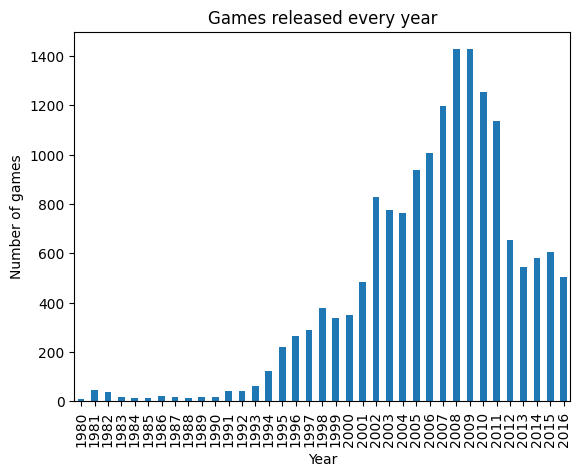

In [22]:
# 'platform has no null
games.groupby(['year_of_release'])['platform'].count().plot(kind='bar')
plt.ylabel('Number of games')
plt.xlabel('Year')
plt.title('Games released every year')
plt.show()

In [23]:
# Show the number of games released during the first decade
# 'platform has no null
games_bp = games.groupby(['year_of_release', 'platform'])['total_sales'].count()
games_bp.head(10)

year_of_release  platform
1980             2600         9
1981             2600        46
1982             2600        36
1983             2600        11
                 NES          6
1984             2600         1
                 NES         13
1985             2600         1
                 DS           1
                 NES         11
Name: total_sales, dtype: int64

We first see a **relatively steady trend** from 1980 to 1990, of a few games released every year

Starting in 1991 we start seeing a **crescent** trend of many more games released every year. 
A trend that was roughly maintained until it reached a peak of about 1400 games released in 2008 and 2009.

Since then, we have seen a **decreasing** trend.<br>
We can correlate this last change in trend with the financial crisis of 2008, which may have provoked a shift in the market dynamic. 
With deeper research, we may find that big video game producers started to consolidate and displace smaller ones, and that the focus shifted from quantity to quality of games.

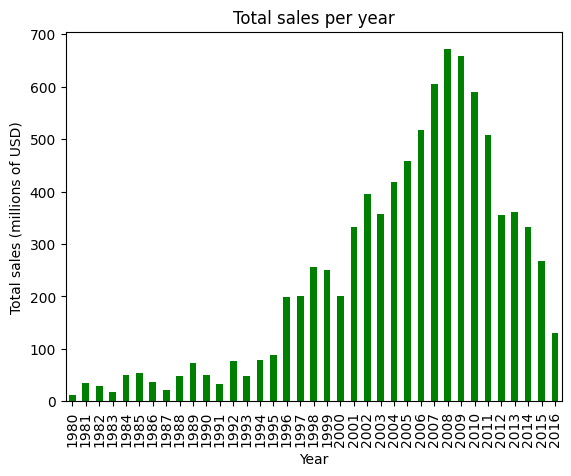

In [24]:
# 'platform has no null
games.groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='g')

plt.ylabel('Total sales (millions of USD)')
plt.xlabel('Year')
plt.title('Total sales per year')



#games.groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.show()

We see a similar behavior when it comes to the total sales per year.

### Historical sales by platform

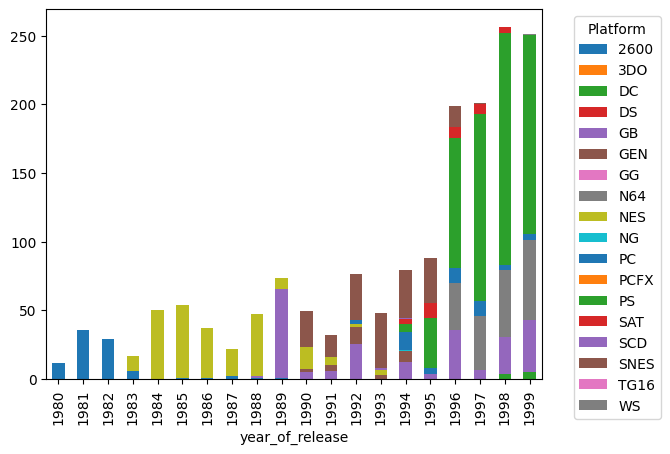

In [25]:
# Show a general view of the sales by platform in the first period
games[games['year_of_release']<2000].pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='total_sales',
                  aggfunc='sum').plot(kind='bar', stacked=True)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


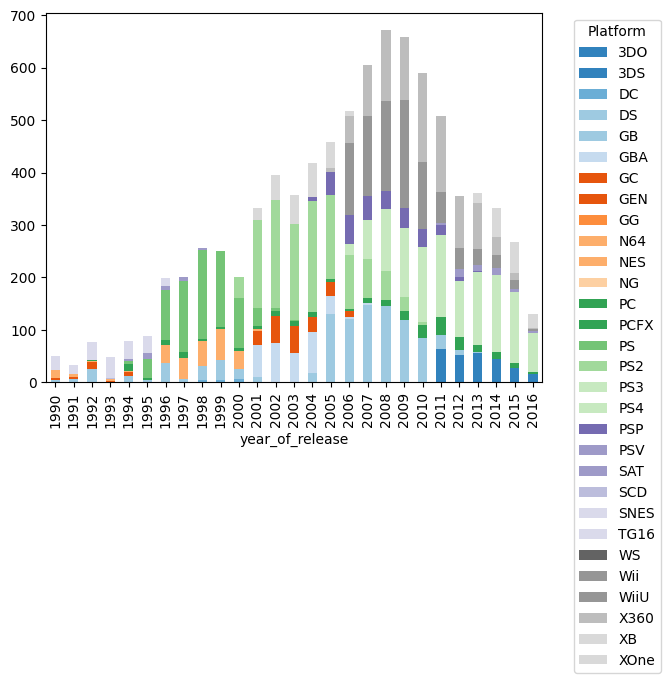

In [26]:
# Show a general view of the sales by platform in the second ant third periods

games[games['year_of_release']>=1990] \
    .pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='total_sales',
                  aggfunc='sum') \
    .plot(kind='bar', stacked=True, colormap='tab20c',)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [27]:
# Print the top sellers of all time in order
top_sales = (games.groupby('platform')['total_sales']
                    .sum().sort_values(ascending=False)) # slicing syntax to reverse the list
top_sales = top_sales.head(13) # Define the number of platforms to consider
# Top 13-15 includes older platforms like GB, NES and N64
top_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
Name: total_sales, dtype: float64

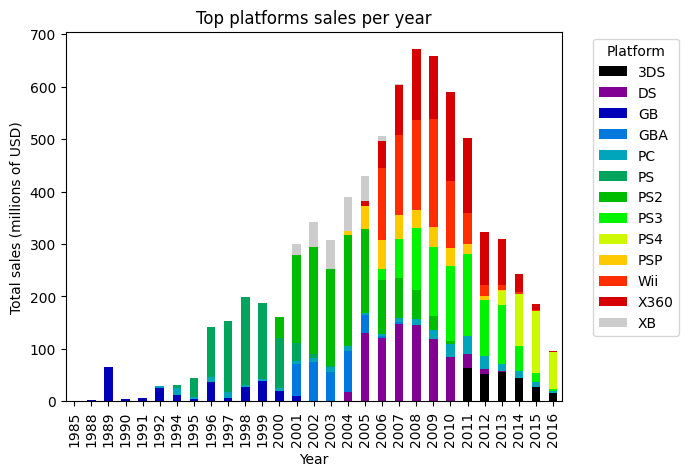

In [28]:

#platform_order = top10_sales.index.tolist() # to maintain the order by total sales

pt = (
    games.query('platform in @top_sales.keys()')
        .pivot_table(
            index='year_of_release', 
            columns='platform', 
            values='total_sales',
            aggfunc='sum'
        )
)
pt.plot(kind='bar', stacked=True, colormap='nipy_spectral')
        
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Total sales (millions of USD)')
plt.xlabel('Year')
plt.title('Top platforms sales per year')

plt.show()


Here we can observe that all the top seller platforms are from one of three brands, except the PC.
Below is a review of the years during which each platform had considerable sales (realtive to other top salers).

Play Station
- PS: 1994 - 2003
- PS2: 2000 - 2010
- PS3: 2006 - 2016 (still has a small amount of sales in the "current" year)
- PS4: 2014 - (should keep increasing its sales in 2017)
- PSP: 2004 - 2013 (lower volume of sales than the PS's)

Nintendo
- GB: 1988 - 2001
- GBA: 2001 - 2007
- DS: 2004 - 2013
- 3DS: 2011 - (still has sales but decreasing)
- Wii: 2006 - 2014

XBOX:
- XB: 2001 - 2006
- X360: 2005 - 2016 (still has a small amount of sales in the "current" year)

PC: <br>
An exception among specialized videogame consoles, as games for PC have been present since at least 1992, although they don't share a veri big part of the market

these top-selling Platforms tend to have considerable sales for about 10 years since their release.


### Delimitation of the data of interest

In [29]:
# Final view of the treated Data Frame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.6+ MB


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda incluir las etapas de tratamiento de datos duplicados y faltantes. Ten en cuenta lo siguiente:

- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

</div>

### Global sales by game

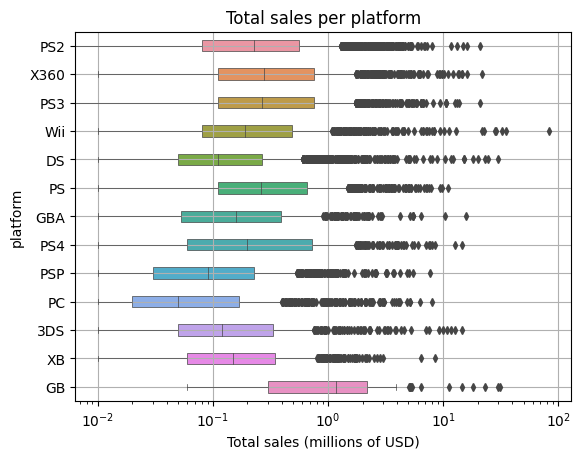

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14261 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14261 non-null  object 
 1   platform         14261 non-null  object 
 2   year_of_release  14027 non-null  Int64  
 3   genre            14261 non-null  object 
 4   na_sales         14261 non-null  float64
 5   eu_sales         14261 non-null  float64
 6   jp_sales         14261 non-null  float64
 7   other_sales      14261 non-null  float64
 8   critic_score     7296 non-null   Int64  
 9   user_score       9083 non-null   object 
 10  rating           9024 non-null   object 
 11  total_sales      14261 non-null  float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.4+ MB


In [30]:
import seaborn as sns

#Plot a boxplot for all top platforms in order
order = list(top_sales.keys())

sns.boxplot(data=games.query("platform in @order"), 
            x='total_sales', y='platform', 
            width=0.4, linewidth=0.5, fliersize=4, order=order)
plt.grid(True)
plt.xscale('log')
plt.title('Total sales per platform')
plt.xlabel('Total sales (millions of USD)')
plt.show()


games.query("platform in @top_sales.keys()").info()
      

We notice a very prominent presence of outliers in these distributions


In [31]:
top_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
Name: total_sales, dtype: float64

In [32]:

platform_sales = games.query("platform == 'Wii'").sort_values(by=['total_sales'], ascending=False)[['name', 'total_sales', 'user_score', 'critic_score']]
platform_sales

,name,total_sales,user_score,critic_score
0,Wii Sports,82.54,8,76
2,Mario Kart Wii,35.52,8.3,82
3,Wii Sports Resort,32.77,8,80
7,Wii Play,28.91,6.6,58
8,New Super Mario Bros. Wii,28.32,8.4,87
...,...,...,...,...
16144,Penguins of Madagascar,0.01,tbd,<NA>
16189,Major Dream: Major Wii Nagero! Gyroball!!,0.01,NaN,<NA>
16195,Super PickUps,0.01,tbd,<NA>
16249,SoulCalibur Legends (JP sales),0.01,NaN,<NA>


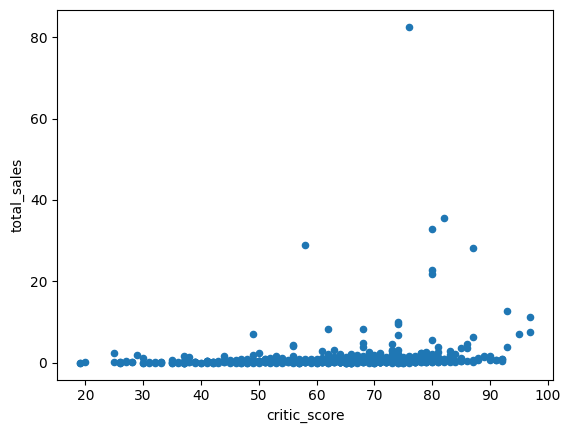

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

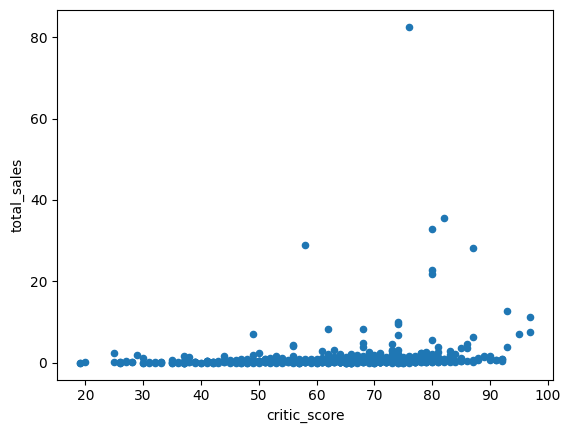

In [33]:
platform_sales.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()
platform_sales.dropna(subset=['critic_score']).plot(x='critic_score', y='total_sales', kind='scatter')


TypeError: 'value' must be an instance of str or bytes, not a float

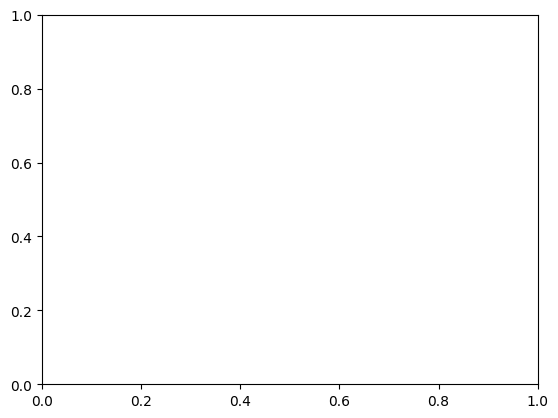

In [34]:
platform_sales.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

## User Profile

## Hypothesis testing


## Conclusions

In [ ]:
Buscar patrones de consumo